In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
""" fonction permettant de créé un dossier qui va contenir tout les histogramme """
""" function allowing to create a folder which will contain all the histogram """
def create_dir(name_dir):
    rep = os.path.join(os. getcwd(), name_dir)
    if(os.path.isdir(rep)):
        file = os.listdir(rep)
        for f in file:
            os.remove(os.path.join(rep, f))
    else:
        os.mkdir(rep)
    return rep
"""create_dir()"""

'create_dir()'

In [3]:
""" fonction permettant l'extraction de la donnée exacte à analyser dans le fichier source """
""" function allowing the extraction of the exact data to be analyzed in the source file """
def initialization_of_treatment(name_file, name_sheet, name_keyword_for_extract, name_new_file_extract, name_col,
                                name_id_to_sort):
    dest_filename = name_file
    print(dest_filename)
    data_to_extract = pd.read_excel(dest_filename, sheet_name=name_sheet) # read file to give 
    new_data = data_to_extract[data_to_extract[name_col]==name_keyword_for_extract].sort_values(by=[name_id_to_sort]) # make 
    if name_sheet == "Donnees_Sorties":
        data = new_data[["Bdsid","Master Id","Client", "Operation","Offre","Cdp",
                                  "Date Debut Dplt", "Date Cr Lien BDSID","Date Installation Client",
                                  "Date Mise En Service", "Date Mef",]] # only column that I want
    elif name_sheet == "Donnees_Stock":
        data = new_data[["Bdsid","Master Id","Client", "Operation","Offre","Cdp",
                                  "Date Debut Dplt", "Date_Cr_Lien_BDSID",'Date Installation Client',
                                 "Date Installation Technique","Date Installation Planifiee",
                                 "Date Mise En Service"]] # only column that I want
    data_to_treat = data[data["Operation"] == "ACTIVATION"].sort_values(by=[name_id_to_sort])
    data_to_treat.to_excel(name_new_file_extract, sheet_name=name_sheet, index = False) # create new 
    data_to_treat_no_Nan = data_to_treat.dropna()
    return data_to_treat_no_Nan, data_to_treat
""" def initialization_of_treatment(name_file, name_sheet, name_keyword_for_extract, name_new_file_extract, name_col,
                                name_id_to_sort) """

' def initialization_of_treatment(name_file, name_sheet, name_keyword_for_extract, name_new_file_extract, name_col,\n                                name_id_to_sort) '

In [4]:
""" fonction permettant de créé une liste des jours férié avec un type datetime """
""" function allowing to create a list of public holidays with a datetime type """
def days_holyday(year):
    list_of_days_holyday = ["01/01", "13/04", "01/05", "08/05", "21/05", "14/07", "15/08", "01/11", "11/11", "25/12"]
    list_of_day_holyday = []
    list_of_month_holyday = []
    list_holydays = []
    for date in range(len(list_of_days_holyday)):
        s = list_of_days_holyday[date].split("/")
        list_holydays.append(datetime.datetime(year,
                                              int(s[1].replace('0','')),
                                              int(s[0].replace('0',''))))
        list_holydays[date]= list_holydays[date].date()
    return list(list_holydays)

""" days_holyday(year) """

' days_holyday(year) '

In [5]:
""" fonction permettant de déterminer le nombre de semaine entre deux dates """
""" function to determine the number of weeks between two dates """
def nb_weekday_between_two_date(d, end, excluded=(6, 7)):
    days = []
    nb_week = 0
    nb_days = 0
    insert = True
    holydays_date = []
    for i in range(d.year,(end.year+1)):
        holydays_date = list(set(holydays_date + days_holyday(i)))
    if d.date() > end.date():
        d , end = end, d
    while d.date() <= end.date():
        insert = True
        #if(pd.isnull(d.date()) == False and pd.isnull(end.date()) == False):
        d += datetime.timedelta(days=1)
        if (d.isoweekday() not in excluded and d.date() not in holydays_date)and d.date() <= end.date():
            days.append(d)
        else:
            insert = False 
        if ((len(days)%5) == 0) and insert == True:
            nb_week += 1
            nb_days +=5
                
    if(len(days)%5 != 0):
        nb_days =(len(days)- nb_days)
    else:
        nb_days = 0
    return nb_week, nb_days

"""nb_weekday_between_two_date(d, end, excluded=(6, 7))"""

'nb_weekday_between_two_date(d, end, excluded=(6, 7))'

In [6]:
""" fonction permettant de connaitre approximativement les dates qui pourrait remplacer les cellule vide et retournant un nouveau dictionnaire sans valeur nulle"""
""" function allowing to know approximately the dates which could replace empty cells and returning a new dictionary with no null value"""
def evaluation_date_replace_nan(data_to_treat_no_Nan,name_sheet, offre):
    list_step_to_nan = ["First Step Nan", "Second Step Nan", "Third Step Nan", "Fourth Step Nan"]
    list_evaluation_to_nan=[]
    moy = 0
    ecart = 0
    dict_to_eval_nan = {"First Step Nan":0, "Second Step Nan":0, "Third Step Nan":0, "Fourth Step Nan":0}
    all_offre = list(data_to_treat_no_Nan['Offre'])
    if(name_sheet == "Donnees_Stock"):
        del dict_to_eval_nan["Fourth Step Nan"]
    for offre in range(len(all_offre)):
        if(name_sheet == "Donnees_Stock"):
            if(pd.isnull(list(data_to_treat_no_Nan["Date Installation Technique"])[offre]) == True):
                 list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]
            elif(pd.isnull(list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]) == True):
                 list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Technique"])[offre]
            else:
                list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]
            
            list_of_all_date = [list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre],
                                   list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre]]
            dict_to_eval_nan["First Step Nan"] = dict_to_eval_nan["First Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre])[0]
            dict_to_eval_nan["Second Step Nan"] = dict_to_eval_nan["Second Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre], list(data_to_treat_no_Nan['Date Installation Client'])[offre])[0]
        else:
            list_of_all_date = [list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre],
                               list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre],
                               list(data_to_treat_no_Nan['Date Mef'])[offre]]
            dict_to_eval_nan["First Step Nan"] = dict_to_eval_nan["First Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre])[0]
            dict_to_eval_nan["Second Step Nan"] = dict_to_eval_nan["Second Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre], list(data_to_treat_no_Nan['Date Installation Client'])[offre])[0]
            dict_to_eval_nan["Fourth Step Nan"] = dict_to_eval_nan["Fourth Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Mise En Service'])[offre], list(data_to_treat_no_Nan['Date Mef'])[offre])[0]
            
        dict_to_eval_nan["Third Step Nan"] = dict_to_eval_nan["Third Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre])[0]
    
    for key,value in dict_to_eval_nan.items():
        dict_to_eval_nan[key]=round(value/len(all_offre))
    return dict_to_eval_nan
        
"""evaluation_date_replace_nan(data_to_treat_no_Nan,name_sheet, offre)"""

'evaluation_date_replace_nan(data_to_treat_no_Nan,name_sheet, offre)'

In [7]:
""" fonction permettant de rajouter un nombre de semaine a la date précédante lorsque 
la cellule est vide """
""" function allowing to add a number of weeks to the previous date when the cell is empty """
def check_nb_week_use_to_nan(step_at_moment,dico_to_eval_nan):
    return datetime.timedelta(weeks=dico_to_eval_nan[step_at_moment+" Nan"])

""" check_nb_week_use_to_nan(step_at_moment,dico_to_eval_nan) """

' check_nb_week_use_to_nan(step_at_moment,dico_to_eval_nan) '

In [8]:
""" fonction permettant de calculer le temps total pour un projet d'un cdp """
""" function allowing to calculate the total time for a project of a cdp """
def calcul_total_week_do_by_cdp(cdp, l_day, dict_time_do):
    total_week, total_day = 0, 0
    cpt_day = 0
    for key, value in dict_time_do.items():
        week = 0
        week = value
        day = l_day[cpt_day]
        total_week = total_week + week
        if total_day >= 5:
            total_week += 1
            total_day = total_day - 5
        else:
            total_day = total_day + day
        cpt_day +=1 
    return total_week    

""" calcul_total_week_do_by_cdp(cdp, l_day, dict_time_do) """

' calcul_total_week_do_by_cdp(cdp, l_day, dict_time_do) '

In [9]:
""" fonction permettant de créé un dictionnaire contenant le temps pour chaque phase et le
    temps totale pour un projets d'un cdp """
""" function allowing to create a dictionary containing the time for each phase and the total
    time for a cdp projects """
def create_dict_cdp_time_do(name_cdp, name_project, idProject, list_date_to_check, name_sheet,dico_to_eval_nan):
    list_step = ["First Step", "Second Step", "Third Step", "Fourth Step", "Total week"]
    dict_cdp_time_do = {}
    dict_step_to_do_cdp = {}
    l_day = []
    if(name_sheet == "Donnees_Stock"):
        del list_step[3]       
    for i in range(len(list_step)-1):
        week_to_add = 0
        if(pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == False):
            week_to_add = check_nb_week_use_to_nan(list_step[i],dico_to_eval_nan)
            list_date_to_check[i] = list_date_to_check[i+1]-week_to_add
        elif(pd.isnull(list_date_to_check[i]) == False and pd.isnull(list_date_to_check[i+1]) == True):
            week_to_add = check_nb_week_use_to_nan(list_step[i],dico_to_eval_nan)
            list_date_to_check[i+1] = list_date_to_check[i]+week_to_add
        elif pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == True:
            indexNames = data_to_treat[idProject].index
            data_to_treat.drop(indexNames , inplace=True)
            continue
        date1 = str(list_date_to_check[i]).split(' ')[0].split("-")
        date2 = str(list_date_to_check[i+1]).split(' ')[0].split("-")

        end = datetime.datetime(int(date2[0]),int(date2[1]),int(date2[2]))
        deb = datetime.datetime(int(date1[0]),int(date1[1]),int(date1[2]))

        dict_step_to_do_cdp[list_step[i]], day = nb_weekday_between_two_date(deb, end)
        l_day.append(day)
    dict_step_to_do_cdp[list_step[len(list_step)-1]] = calcul_total_week_do_by_cdp(name_cdp, l_day, dict_step_to_do_cdp)
    dict_cdp_time_do[name_cdp] = dict_step_to_do_cdp
    dict_cdp_time_do['Project'] = name_project
    dict_cdp_time_do['IdProject'] = idProject
    return dict_cdp_time_do

""" create_dict_cdp_time_do(name_cdp, name_project, idProject, list_date_to_check, name_sheet,dico_to_eval_nan) """

' create_dict_cdp_time_do(name_cdp, name_project, idProject, list_date_to_check, name_sheet,dico_to_eval_nan) '

In [10]:
def check_nb_graph_create(taille,N=30,n= 30,NB_GRAPH = 1,before = 0):
    NB_GRAPH=taille/N
    if(NB_GRAPH>int(NB_GRAPH)):
        NB_GRAPH=int(NB_GRAPH)+1
    if(NB_GRAPH%2==0):
        l=NB_GRAPH/2
    else:
        l=int(NB_GRAPH/2)+1
    return NB_GRAPH
#check_nb_graph_create(48)

In [11]:
def create_dataviz(x,y,name_xlabel, name_ylabel, titles, name_img, rep, colors='white'):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    plt.setp(ax.get_xticklabels(),rotation=90, ha="right")
    plt.tick_params(axis='x', which='major', labelsize=10, labelcolor=colors)
    plt.tick_params(axis='y', which='major', labelsize=10, labelcolor=colors)
    plt.tight_layout()
    plt.xlabel(name_xlabel, size=10,color=colors)
    plt.ylabel(name_ylabel, size=10,color=colors)
    plt.title(titles, color=colors)
    plt.savefig(os.path.join(rep,name_img+".png"))
#create_dataviz(['a','e','d','q'], [2,4,5,9],"cdp","Nombre de projets","Chaque cdp avec son nombre de projet",'figsize_test5.png','white')

In [12]:
""" fonction retournant un dictionnaire contenant chaque cdp avec son nombre de projet total """
""" function returning a dictionary containing each cdp with its total number of projects """
def listCdp_numberProject(data):
    list_cdp_sans_doublons = list(set(data['Cdp']))
    list_cdp = list(data['Cdp'])
    list_project = list(data['Bdsid'])
    cpt_project = 0
    dict_cdp_and_project = {}
    
    for c in range(len(list_cdp_sans_doublons)):
        cdp = list_cdp_sans_doublons[c]
        if(type(cdp) != str):
            list_cdp[c] = "Sans nom"
            cdp = list_cdp[c]
        for p in range(len(list_project)):
            if(list_cdp[p] == cdp):
                cpt_project+=1
        dict_cdp_and_project[cdp] = cpt_project
        cpt_project = 0
    return dict_cdp_and_project     

def dataviz_cdp_and_nbProject(data_to_treat, rep):
    N=30
    n= 30
    NB_GRAPH = 1
    before = 0
    dico = listCdp_numberProject(data_to_treat)
    print(dico)
    x=[]
    y=[]
    for key, value in dico.items():
        x.append(key)
        y.append(value)
    taille = len(x)
    if(taille>30):
        NB_GRAPH = check_nb_graph_create(taille)
        for z in range(NB_GRAPH):
            list_time_to_do_x = x[before:N]
            list_time_to_do_y = y[before:N]
            create_dataviz(list_time_to_do_x, list_time_to_do_y,"cdp","Nombre de projets","Chaque cdp avec son nombre de projet",'dataviz_cdp_and_nbProject'+str(z+1), rep)
            before=N
            N+=n
    else:
        create_dataviz(list_time_to_do_x, list_time_to_do_y,"cdp","Nombre de projets","Chaque cdp avec son nombre de projet",'dataviz_cdp_and_nbProject_Graph', rep)
            
""" dataviz_cdp_and_nbProject(data_to_treat) """
    

' dataviz_cdp_and_nbProject(data_to_treat) '

In [13]:
""" fonction permettant de d'afficher une l'histogramme d'un projet d'un cdp """
""" function allowing to display a histogram of a cdp project """
def dataviz_Onecdp_Oneproject(dico_date_in_week,name_cdp, name_project, idProject, rep):
    list_step_to_do = []
    xl = []
    yl = []
    list_time_to_do = dico_date_in_week[name_cdp]
    for search in list_time_to_do:
        if search['IdProject'] == idProject:
            xl = list(search[name_cdp].keys())[:len(list_step_to_do)-1]
            yl = list(search[name_cdp].values())[:len(list_step_to_do)-1]
            break
    title = f"Temps effectuer par étape par le cdp : {name_cdp} pour le projet {name_project} d'id {idProject}"
    create_dataviz(xl,yl,"Step", "Number week", title, "dataviz_Onecdp_Oneproject", rep)

"""dataviz_Onecdp_Oneproject(dico_date_in_week,name_cdp, name_project, idProject)"""

'dataviz_Onecdp_Oneproject(dico_date_in_week,name_cdp, name_project, idProject)'

In [14]:
""" fonction permettant de créé l'histogramme du temps total pour chaque projet d'un cdp """
""" function allowing to create the histogram of the total time for each project of a cdp """
def dataviz_AllProject_TotalTime_OneCdp(dico_date_in_week,name_cdp, rep):
    N=30
    n= 30
    NB_GRAPH = 1
    list_step_to_do = []
    xl = []
    yl = []
    list_time_to_do = dico_date_in_week[name_cdp]
    before = 0
    taille = len(list_time_to_do)
    if(taille>30):
        NB_GRAPH = check_nb_graph_create(taille)
        for z in range(NB_GRAPH):
            list_time_to_do = dico_date_in_week[name_cdp][before:N]
            for search in list_time_to_do:
                xl.append(str(search['IdProject']))
                # xl.append(str(search['IdProject'])+"-"+str(search['Project']))
                yl.append(int(search[name_cdp]['Total week']))
            create_dataviz(xl,yl,"Projects", "Total time", "Temps totale effectuer pour chacun de ces projets par le cdp", "dataviz_AllProject_TotalTime_OneCdp_Graphe"+str(z+1), rep)
            xl=[]
            yl=[]
            before=N
            N+=n
    else:
        create_dataviz(xl,yl,"Projects", "Total time", "Temps totale effectuer pour chacun de ces projets par le cdp", "dataviz_AllProject_TotalTime_OneCdp_Graphe.png", rep)
                       
""" dataviz_AllProject_TotalTime_OneCdp(dico_date_in_week,name_cdp) """

' dataviz_AllProject_TotalTime_OneCdp(dico_date_in_week,name_cdp) '

In [15]:
""" fonction permettant de calculer le temps total moyen sur tout les projets d'un cdp """
""" function allowing to calculate the average total time on all the projects of a cdp """
def calculate_TotalTime_AllProject_Avg_OneCdp(dico_date_in_week,name_cdp):
    moy, somme = 0, 0
    list_time_to_do = dico_date_in_week[name_cdp]
    if(type(list_time_to_do[-1]) != int):
        for search in list_time_to_do:
            somme = somme + search[name_cdp]['Total week']
        moy = int(int(somme) / int(len(list_time_to_do)))
        dico_date_in_week[name_cdp].append(moy)
        return moy
    else:
        return list_time_to_do[-1]
    
""" calculate_TotalTime_AllProject_Avg_OneCdp(dico_date_in_week,name_cdp) """

' calculate_TotalTime_AllProject_Avg_OneCdp(dico_date_in_week,name_cdp) '

In [16]:
""" fonction affichant l'histogramme entre temps total moyen de tout les projets d'un cdp 
    par cdp  """
""" function displaying the histogram between average total time of all the projects of 
    a cdp by cdp """
def dataviz_AllCdp_AvgTime(dico_date_in_week,list_cdp, rep):
    N=30
    n= 30
    NB_GRAPH = 1
    before=0
    list_step_to_do = []
    xl = []
    yl = []
    xl=list_cdp
    for key, value in dico_date_in_week.items():
        yl.append(value[-1])
    taille = len(xl)
    if(taille>30):
        NB_GRAPH = check_nb_graph_create(taille)
        for z in range(NB_GRAPH):
            list_time_to_do_x = xl[before:N]
            list_time_to_do_y = yl[before:N]
            create_dataviz(list_time_to_do_x, list_time_to_do_y,"cdp","Temps moyen","Temps moyen effectuer par chaque cdp pour tout leur projet ","dataviz_AllCdp_AvgTime"+str(z+1),rep)
            before=N
            N+=n
    else:
        create_dataviz(list_time_to_do_x, list_time_to_do_y,"cdp","Temps moyen","Temps moyen effectuer par chaque cdp pour tout leur projet ",'dataviz_AllCdp_AvgTime_Graphe',rep)
            
""" dataviz_AllCdp_AvgTime(dico_date_in_week,list_cdp) """

' dataviz_AllCdp_AvgTime(dico_date_in_week,list_cdp) '

In [17]:
""" fonction permettant de vérifier en terme de pourcentage sur combien de projet il etait ou pas dans la marge """
""" function allowing to check in terms of percentage on how many project it was or not in the margin """
def check_cdp_out_of_limit_AllProject(dict_delay):
    nb_cdp_in_limit = 0
    list_cdp_in_limit = []
    nb_cdp_out_limit = 0
    list_cdp_out_limit = []
    nb_cdp_equal_limit = 0
    list_cdp_equal_limit = []
    for value in range(len(dict_delay)-1):
        if dict_delay[value][name_cdp]['Total week'] < 4:
            nb_cdp_in_limit +=1
            list_cdp_in_limit.append(dict_delay[value]['IdProject'])            
        elif dict_delay[value][name_cdp]['Total week'] > 4:
            nb_cdp_out_limit +=1
            list_cdp_out_limit.append(dict_delay[value]['IdProject'])  
        else:
            nb_cdp_equal_limit +=1
            list_cdp_equal_limit.append(key) 
    percent_in_limit = round((nb_cdp_in_limit*100)/len(dict_delay))
    percent_out_limit = round((nb_cdp_out_limit*100)/len(dict_delay))
    percent_equal_limit = round((nb_cdp_equal_limit*100)/len(dict_delay))
    return [percent_in_limit, percent_equal_limit, percent_out_limit], list_cdp_in_limit, list_cdp_out_limit,list_cdp_equal_limit

""" check_cdp_out_of_limit_AllProject(dict_delay) """


' check_cdp_out_of_limit_AllProject(dict_delay) '

In [18]:
""" histogramme represente le pourcentage en terme de marge respecter """
""" histogram represents the percentage in terms of margin to respect """
def dataviz_check_OneCdp_out_limit_All_Project(list_delay, rep):
    l = ["IN Limit", "Equal Limt", "Out Limit"]
    create_dataviz(l, list_delay[0],"Type de limit","Pourcentage de projet","f'Representation du pourcentage de projet hors limite de date'",'dataviz_check_OneCdp_out_limit_All_Project', rep)
"""dataviz_check_OneCdp_out_limit_All_Project(list_delay)"""

'dataviz_check_OneCdp_out_limit_All_Project(list_delay)'

Doc_to_treat\Suivi_PRI.xlsx
{'TYBx0D05': [{'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 9948415}, {'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 9951790}, {'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 9951907}, {'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 9951941}, {'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 9951946}, {'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 9951954}, {'TYBx0D05': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total week': 31}, 'Project': 'THYM BUSINESS', 'IdProject': 99

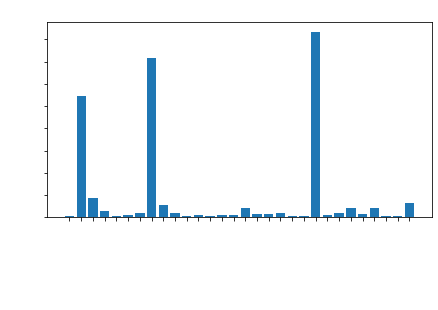

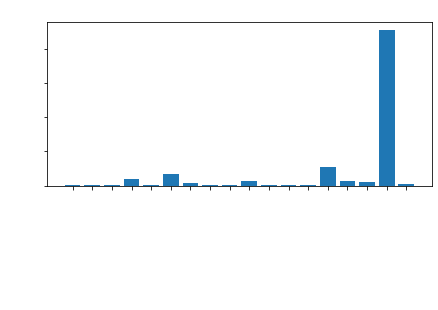

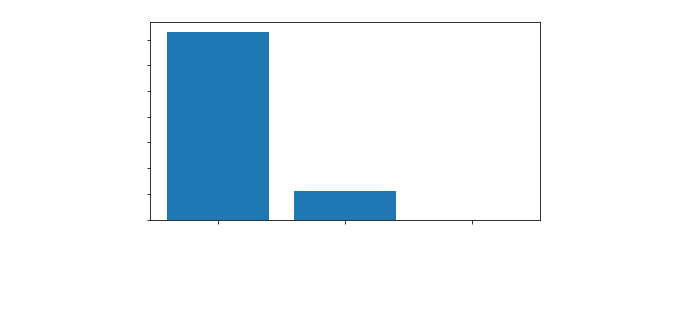

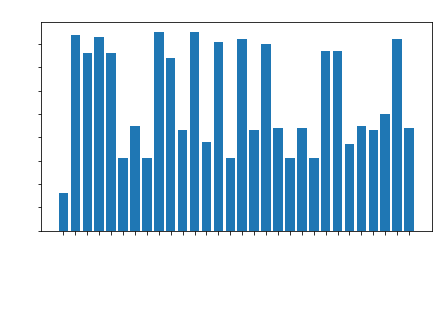

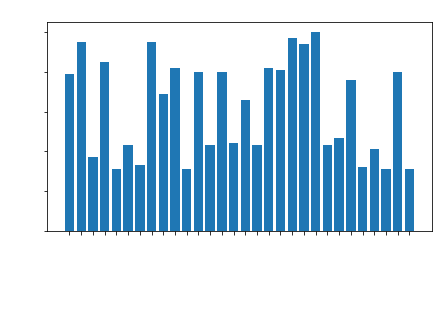

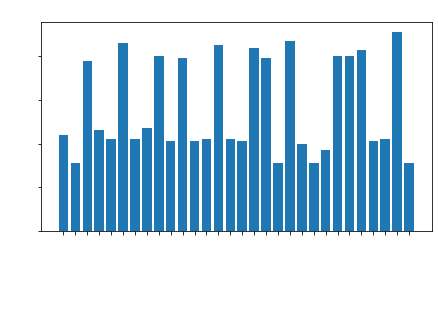

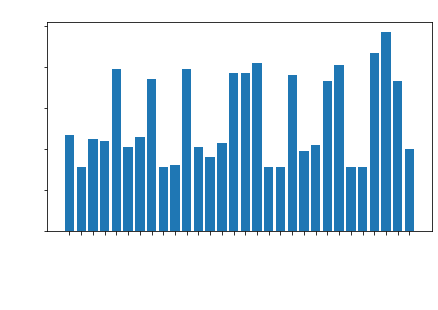

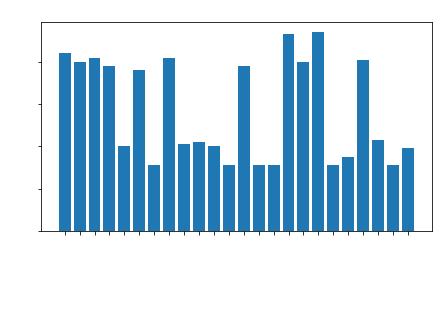

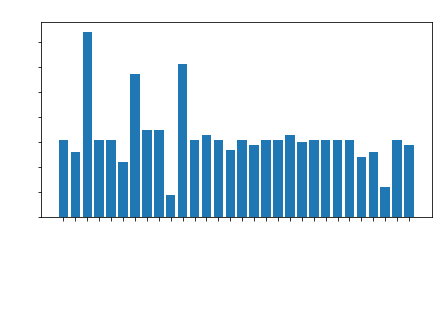

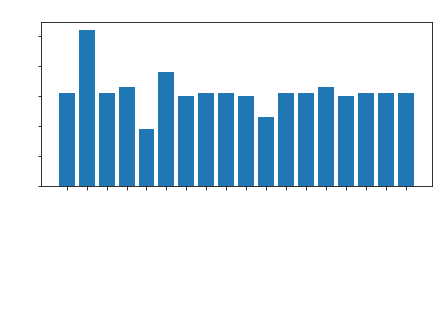

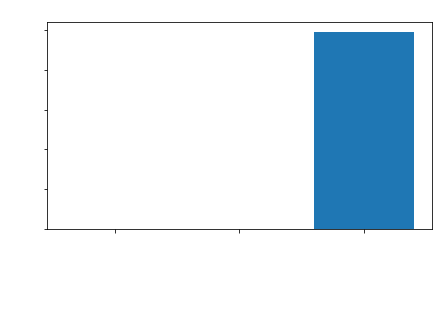

In [19]:
if __name__ == '__main__': # It's the main
    config = pd.read_excel('ConfigExtraction.xlsx')
    dict_all_var = dict(zip(config["variables"].to_list(),config["values"].to_list()))
    name_dir_histogram = dict_all_var["name_dir_histogram"]
    rep = create_dir(name_dir_histogram)
    name_dir = dict_all_var["dir_parent_name_to_treat"]
    name_file = name_dir+"\\"+dict_all_var["name_file"]
    name_sheet = dict_all_var["name_sheet"]
    name_keyword_for_extract = dict_all_var["name_keyword_for_extract"]
    name_cdp=dict_all_var["name_cdp_study"]
    name_project = dict_all_var["name_project_of_cdp"]
    idProject = dict_all_var["id_project"]
    name_col_offre = "Offre"
    name_id_to_sort = 'Bdsid'
    name_new_file_extract = name_dir+"\\"+"New_"+name_file.replace(name_dir+"\\","")
    
    data_to_extract = pd.read_excel(name_file, sheet_name=name_sheet)
    
    dict_to_eval_date_nan={}
    data_to_treat_no_Nan, data_to_treat = initialization_of_treatment(name_file, name_sheet, name_keyword_for_extract,
                                name_new_file_extract, name_col_offre,name_id_to_sort)
    
    if(len(data_to_treat_no_Nan) == 0):
        print(f"Les données présents sont insuffisants pour l'étude de l'offre {name_keyword_for_extract}")
    else:        
        dict_to_eval_date_nan = evaluation_date_replace_nan(data_to_treat_no_Nan,name_sheet, name_col_offre)
        all_cdp = list(data_to_treat['Cdp'])
        all_project = list(data_to_treat['Client'])
        all_Idproject = list(data_to_treat['Bdsid'])
        list_action_cdp = []
        dict_all_cdp_time_do={}
        list_action_every_cdp = []
        list_cdp_without_duplication=[]

        for cdp in range(len(all_cdp)):
            if(name_sheet == "Donnees_Stock"):
                list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date_Cr_Lien_BDSID'])[cdp],
                                       list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp]]
            else:
                list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date Cr Lien BDSID'])[cdp],
                                   list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp],
                                   list(data_to_treat['Date Mef'])[cdp]]
            if(type(all_cdp[cdp]) != str):
                all_cdp[cdp] = "Sans nom"
            list_action_cdp.append(create_dict_cdp_time_do(all_cdp[cdp], all_project[cdp], all_Idproject[cdp], list_of_all_date, name_sheet, dict_to_eval_date_nan))

        list_cdp_without_duplication = list(set(all_cdp))
        for cdp in list_cdp_without_duplication :
            for act_cdp in list_action_cdp:
                if cdp == list(act_cdp.keys())[0]:
                    list_action_every_cdp.append(act_cdp)
                    dict_all_cdp_time_do[cdp] = list_action_every_cdp
            list_action_every_cdp=[]
            
        print(dict_all_cdp_time_do)
        
        dataviz_cdp_and_nbProject(data_to_treat, rep)
        
        dataviz_Onecdp_Oneproject(dict_all_cdp_time_do,name_cdp, name_project, idProject, rep)
        
        dataviz_AllProject_TotalTime_OneCdp(dict_all_cdp_time_do,name_cdp, rep)
        
        for key, value in dict_all_cdp_time_do.items():
            calculate_TotalTime_AllProject_Avg_OneCdp(dict_all_cdp_time_do,key)
        dataviz_AllCdp_AvgTime(dict_all_cdp_time_do,list_cdp_without_duplication, rep)
        
        list_out_bounds = check_cdp_out_of_limit_AllProject(dict_all_cdp_time_do[name_cdp])
        dataviz_check_OneCdp_out_limit_All_Project(list_out_bounds, rep)

In [ ]:
*************************** PROJET DE VISUALISATION *************************

*************************** BUT DU PROGRAMME *************************
Le projet consiste a fait une visualisation afin de vérifier les cdps ayant dépasserla limite de temps requis pour la réalisation d'un projet.

*************************** LANCEMENT DU PROGRAMME *************************
/*** Sur JupyterNoteBook ***/
Lancer tous simplement le programme depuis l'option Kernel > Restart & Run All

*************************** EXPLICATION DU PROGRAMME ***********************
Le programme au lancement créé un repectoire appelé ALL_HISTOGRAM (le nom peut être changé dans
le fichier excel ConfigExtraction.xlsx), ensuite initialise les variables neccessaire pour le
traitement et la visualisation des données du fichier excel donnée.

Après cette étape appel la fonction ***initialization_of_treatment*** afin de vérifier si avec les
paramètre fourni dans le fichier ***ConfigExtraction*** l'on peut fait le traitement et visualisé les données. Dans le cas échéant il affiche un message(voir code ou lors de l'éxécution avec comme paramètre 
de l'offre 9 office ims), sinon il appele la fonction ***evaluation_date_replace_nan*** qui va créé un nouveau dictionnaire sans valeur nulle, pour etre passé en paramètre à la fonction ***create_dict_cdp_time_do*** qui permettra de créé un dictionnaire(le nom est ***dict_all_cdp_time_do***) lié a chaque cdp(clé) qui auront pour valeur une liste de dictionnaire(contiendra tout les projet lié a eux).

Avec ce dictionnaire l'ont pourra ainsi créé les histogrammes lié a notre étude a savoir:
- liste des cdp avec leur nombre de projet a chacun
- temps emis sur chaque phase d'un projet pour un cdp
- temps totale mis pour la réalisation de chacun de tout ses projets pour un cdp
- temps moyen mis pour la réalisation de tout ses projets
- en terme de pourcentage le nombre de projets hors délai limite ou non ou égale au delai limite


***************************************** FIN *******************************************